In [ ]:
!pip install --upgrade osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.3/101.3 kB 2.2 MB/s eta 0:00:00


In [ ]:
# =============================================================================
# CELDA 1: IMPORTS
# =============================================================================
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Configuración para fondo negro
plt.style.use('dark_background')

In [ ]:
# =============================================================================
# CELDA 2: DISTRITOS Y ÁREAS
# =============================================================================
district_names = [
    "Ciutat Vella", "Eixample", "Sants-Montjuïc", "Les Corts",
    "Sarrià-Sant Gervasi", "Gràcia", "Horta-Guinardó",
    "Nou Barris", "Sant Andreu", "Sant Martí"
]

# Áreas en km²
district_areas = {
    "Ciutat Vella": 4.2, "Eixample": 7.5, "Sants-Montjuïc": 21.4,
    "Les Corts": 6.0, "Sarrià-Sant Gervasi": 20.1, "Gràcia": 4.2,
    "Horta-Guinardó": 11.9, "Nou Barris": 8.0, "Sant Andreu": 6.6, "Sant Martí": 10.8
}

print(f"Distritos: {len(district_names)}")

Distritos: 10


In [ ]:
# CELDA 3: CARGAR DATOS DE TODOS LOS DISTRITOS
# =============================================================================
livability_scores = {}

for district in district_names:
    place = f"{district}, Barcelona"
    print(f"\n📍 {district}")

    try:
        parks = ox.features_from_place(place, tags={'leisure': 'park'})
        parks_count = len(parks)
    except:
        parks_count = 0

    try:
        healthcare = ox.features_from_place(place, tags={'amenity': ['hospital', 'pharmacy']})
        healthcare_count = len(healthcare)
    except:
        healthcare_count = 0

    try:
        education = ox.features_from_place(place, tags={'amenity': ['school', 'university']})
        education_count = len(education)
    except:
        education_count = 0

    try:
        commerce = ox.features_from_place(place, tags={'shop': True})
        commerce_count = len(commerce)
    except:
        commerce_count = 0

    # Calcular densidades por km²
    area = district_areas[district]
    parks_density = parks_count / area
    healthcare_density = healthcare_count / area
    education_density = education_count / area
    commerce_density = commerce_count / area

    # Puntuaciones (0-100)
    parks_score = min(parks_density * 10, 100)
    healthcare_score = min(healthcare_density * 5, 100)
    education_score = min(education_density * 10, 100)
    commerce_score = min(commerce_density * 0.5, 100)

    # Livability Index
    livability_index = (parks_score + healthcare_score + education_score + commerce_score) / 4

    livability_scores[district] = livability_index

    print(f"   Parques: {parks_count}, Salud: {healthcare_count}, Educación: {education_count}, Comercios: {commerce_count}")
    print(f"   📊 Livability Index: {livability_index:.1f}/100")



📍 Ciutat Vella
   Parques: 23, Salud: 79, Educación: 40, Comercios: 1095
   📊 Livability Index: 86.0/100

📍 Eixample
   Parques: 56, Salud: 195, Educación: 71, Comercios: 2307
   📊 Livability Index: 92.3/100

📍 Sants-Montjuïc
   Parques: 69, Salud: 103, Educación: 49, Comercios: 878
   📊 Livability Index: 24.9/100

📍 Les Corts
   Parques: 62, Salud: 62, Educación: 63, Comercios: 480
   📊 Livability Index: 72.9/100

📍 Sarrià-Sant Gervasi
   Parques: 0, Salud: 0, Educación: 0, Comercios: 0
   📊 Livability Index: 0.0/100

📍 Gràcia
   Parques: 0, Salud: 0, Educación: 0, Comercios: 0
   📊 Livability Index: 0.0/100

📍 Horta-Guinardó
   Parques: 59, Salud: 110, Educación: 59, Comercios: 497
   📊 Livability Index: 41.6/100

📍 Nou Barris
   Parques: 62, Salud: 86, Educación: 57, Comercios: 232
   📊 Livability Index: 54.2/100

📍 Sant Andreu
   Parques: 60, Salud: 84, Educación: 51, Comercios: 266
   📊 Livability Index: 63.0/100

📍 Sant Martí
   Parques: 133, Salud: 142, Educación: 87, Comercios

In [ ]:
# CELDA 4: OBTENER GEOMETRÍAS DE DISTRITOS
# =============================================================================
print(f"\n🗺️ Obteniendo límites de distritos...")

district_geometries = {}

for district in district_names:
    try:
        gdf = ox.geocode_to_gdf(f"{district}, Barcelona")
        district_geometries[district] = gdf
        print(f"✅ {district}")
    except:
        print(f"❌ {district}")
        district_geometries[district] = None


🗺️ Obteniendo límites de distritos...
✅ Ciutat Vella
✅ Eixample
✅ Sants-Montjuïc
✅ Les Corts
❌ Sarrià-Sant Gervasi
❌ Gràcia
✅ Horta-Guinardó
✅ Nou Barris
✅ Sant Andreu
✅ Sant Martí



🎨 Creating clean Barcelona livability map...
Processing 8 districts with valid data


/tmp/ipython-input-72-2159946979.py:45: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = district_geometries[district].geometry.centroid.iloc[0]
/tmp/ipython-input-72-2159946979.py:45: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = district_geometries[district].geometry.centroid.iloc[0]
/tmp/ipython-input-72-2159946979.py:45: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = district_geometries[district].geometry.centroid.iloc[0]
/tmp/ipython-input-72-2159946979.py:45: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are like

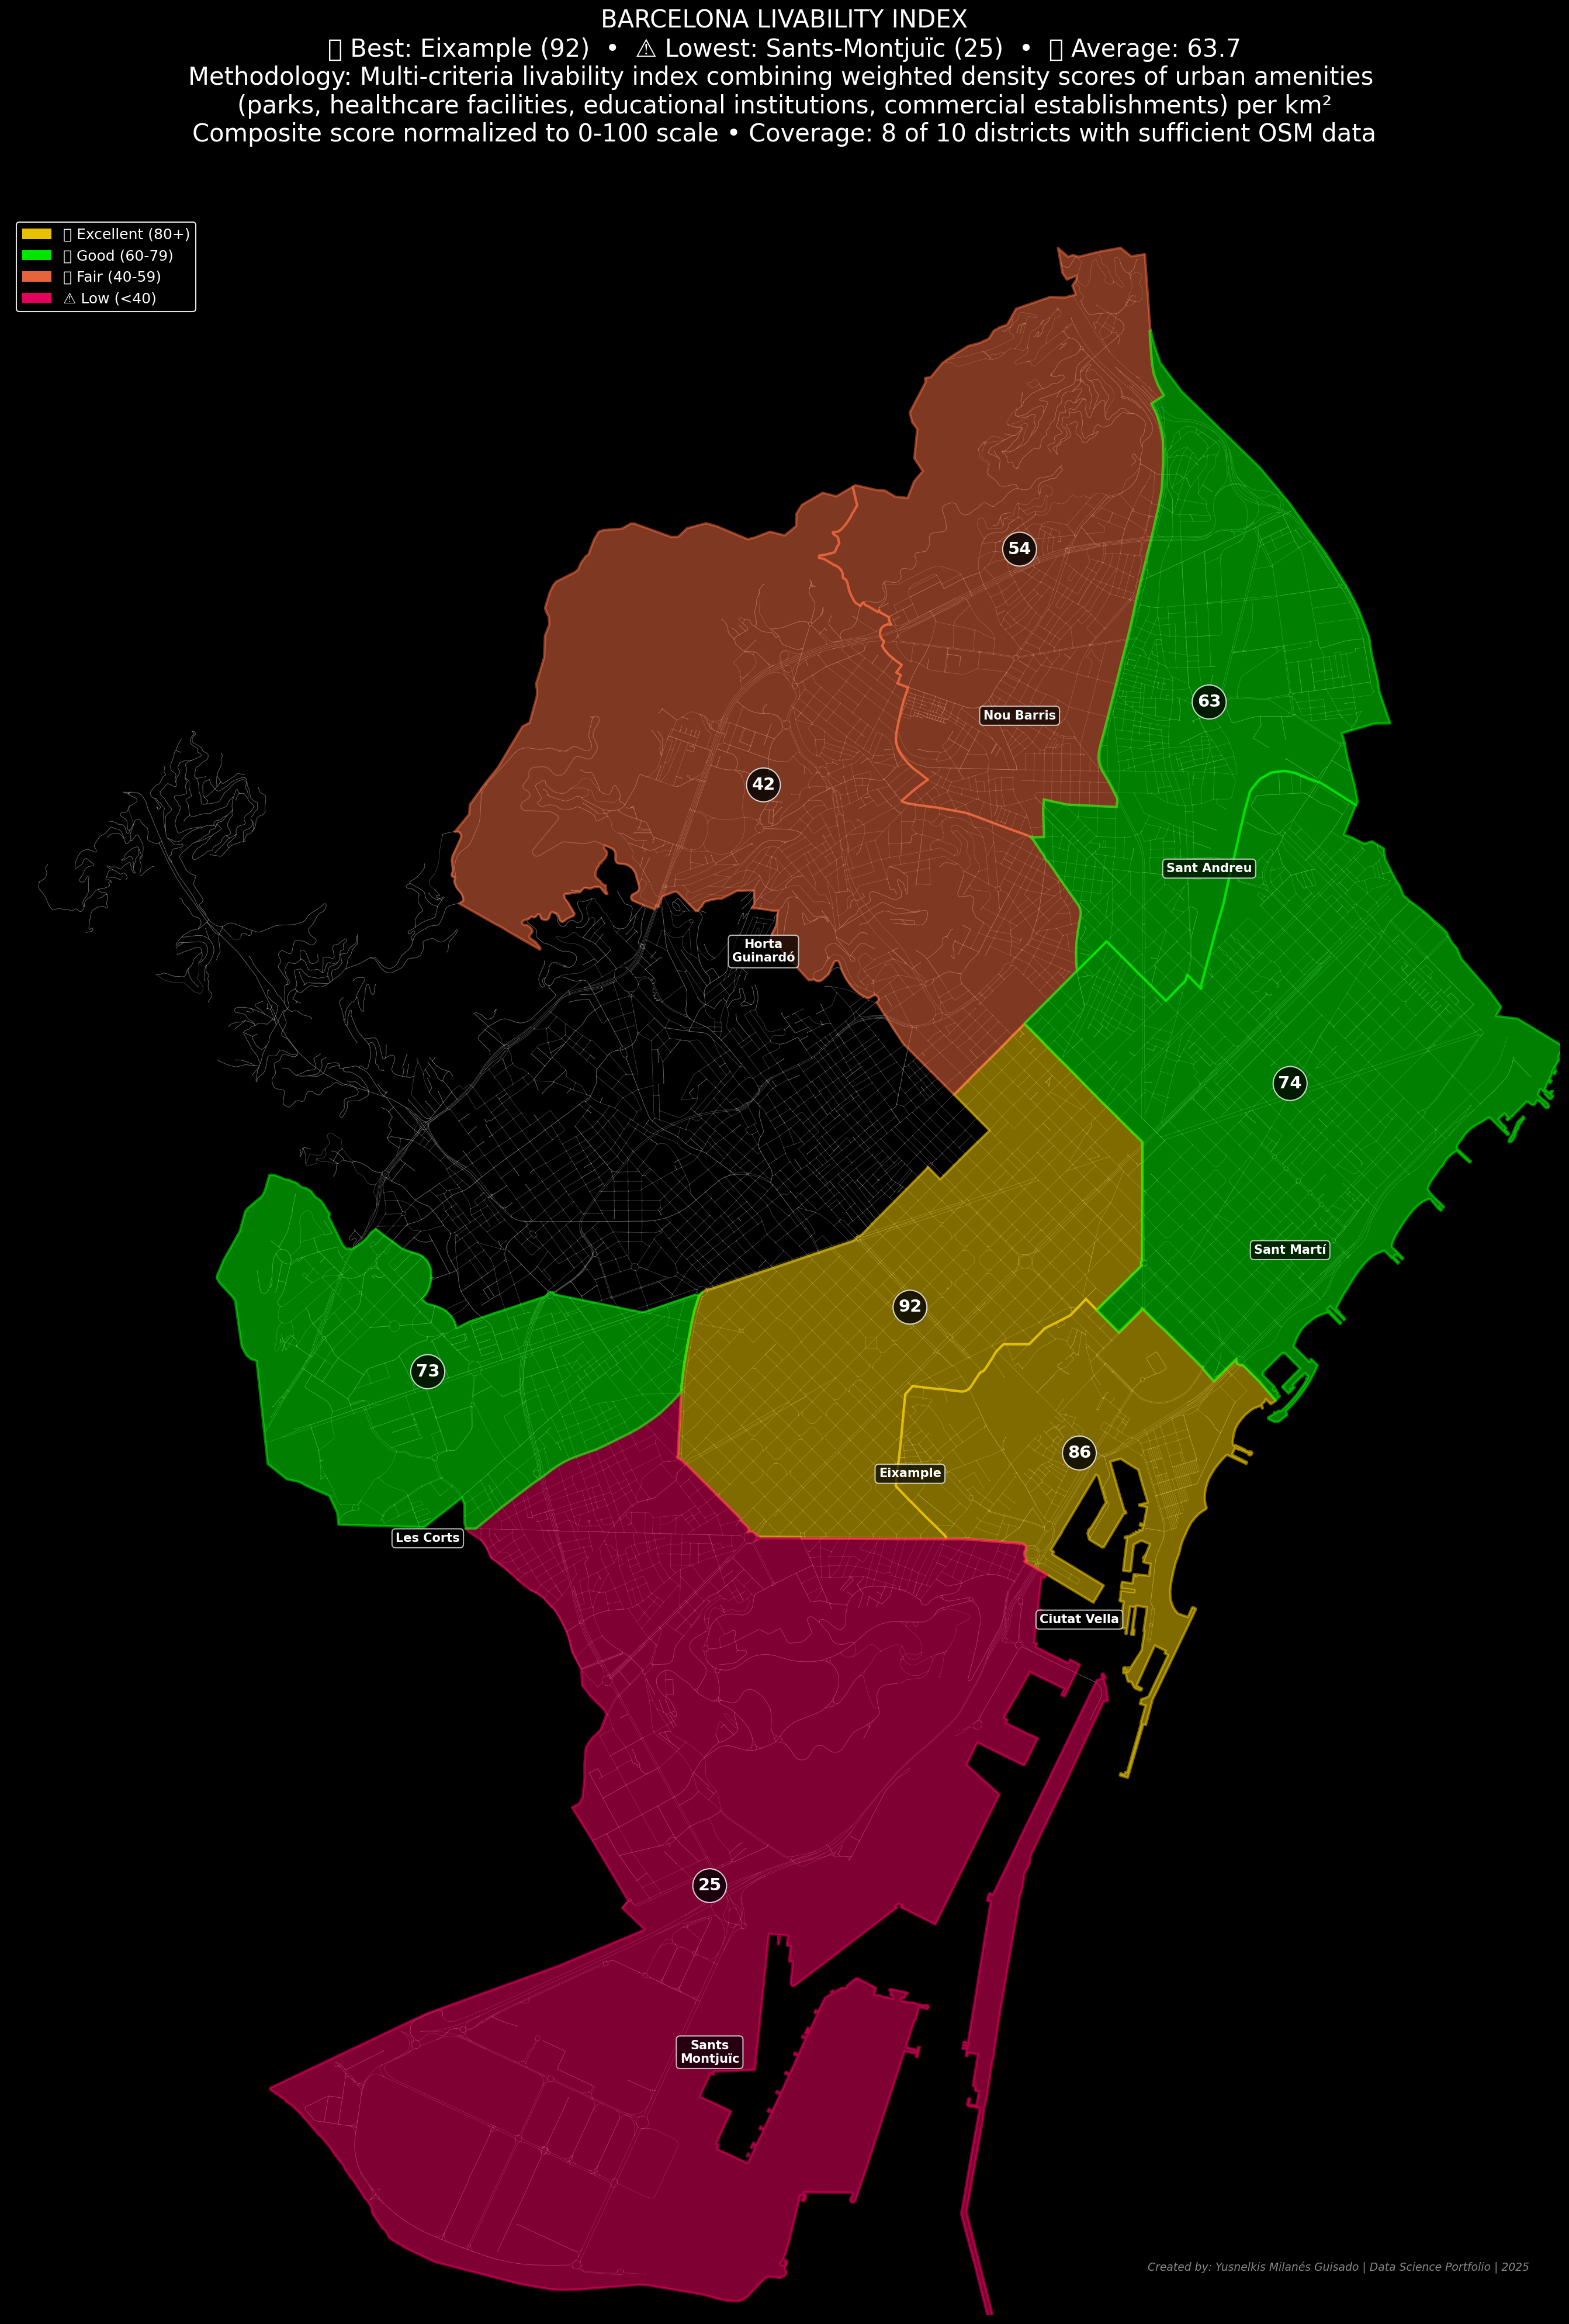

✅ Clean map completed - 8 districts with vibrant colors
📊 NO 'No data' category in legend - only valid districts shown


In [72]:
# BARCELONA LIVABILITY MAP
# =============================================================================
print(f"\n🎨 Creating clean Barcelona livability map...")

# Download Barcelona road network
barcelona_roads = ox.graph_from_place("Barcelona, Spain", network_type='drive')

# Create figure - taller and narrower for better text layout
fig, ax = plt.subplots(figsize=(18, 28), facecolor='black', dpi=150)
ax.set_facecolor('black')

# Road network - subtle but visible through districts
ox.plot_graph(barcelona_roads, ax=ax,
              node_color='#AAAAAA', node_size=0.8, node_alpha=0.4,
              edge_color='#AAAAAA', edge_linewidth=0.4, edge_alpha=0.4,
              bgcolor='black', show=False, close=False)

# Color function - vibrant colors
def get_vibrant_color(score):
    if score >= 80: return '#FFD700'    # Gold
    elif score >= 60: return '#00FF00'  # Bright neon green
    elif score >= 40: return '#FF7043'  # Orange
    else: return '#FF0066'              # Bright pink

# ONLY process districts with valid data (score > 0)
valid_districts = []
for district in district_names:
    if (district_geometries[district] is not None and
        district in livability_scores and
        livability_scores[district] > 0):
        valid_districts.append(district)

print(f"Processing {len(valid_districts)} districts with valid data")

# Draw ONLY valid districts
for district in valid_districts:
    score = livability_scores[district]
    color = get_vibrant_color(score)

    # District fill - semi-transparent to show roads beneath
    district_geometries[district].plot(ax=ax, color=color, alpha=0.5,
                                     edgecolor=color, linewidth=2)

    # Centroid for labels
    centroid = district_geometries[district].geometry.centroid.iloc[0]

    # Score label
    ax.text(centroid.x, centroid.y, f'{score:.0f}',
           ha='center', va='center', fontsize=14,
           fontweight='bold',
           color='white', zorder=11,
           bbox=dict(boxstyle='circle,pad=0.30', facecolor='black',
                    alpha=0.8, edgecolor='white', linewidth=1))

    # District name
    ax.text(centroid.x, centroid.y - 0.012, district.replace('-', '\n'),
           ha='center', va='center', fontsize=10, fontweight='bold',
           color='white',
           bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7),
           zorder=9)

# Calculate statistics from valid districts only
valid_scores = {d: livability_scores[d] for d in valid_districts}
best_district = max(valid_scores, key=valid_scores.get)
best_score = valid_scores[best_district]
worst_district = min(valid_scores, key=valid_scores.get)
worst_score = valid_scores[worst_district]
avg_score = sum(valid_scores.values()) / len(valid_scores)

# TITLE keeping the working position but with smaller methodology
title_text = f'''BARCELONA LIVABILITY INDEX
🏆 Best: {best_district} ({best_score:.0f})  •  ⚠️ Lowest: {worst_district} ({worst_score:.0f})  •  📊 Average: {avg_score:.1f}
Methodology: Multi-criteria livability index combining weighted density scores of urban amenities
(parks, healthcare facilities, educational institutions, commercial establishments) per km²
Composite score normalized to 0-100 scale • Coverage: {len(valid_districts)} of 10 districts with sufficient OSM data'''

# Use set_title with smaller font for more discrete methodology
ax.set_title(title_text, color='white', fontsize=20, fontweight='normal', pad=60)

# LEGEND - ONLY 4 categories for valid data
legend_elements = [
    plt.Circle((0,0), 1, facecolor='#FFD700', alpha=0.9, label='🏆 Excellent (80+)'),
    plt.Circle((0,0), 1, facecolor='#00FF00', alpha=0.9, label='👍 Good (60-79)'),
    plt.Circle((0,0), 1, facecolor='#FF7043', alpha=0.9, label='🔶 Fair (40-59)'),
    plt.Circle((0,0), 1, facecolor='#FF0066', alpha=0.9, label='⚠️ Low (<40)')
]

legend = ax.legend(handles=legend_elements, loc='upper left',
                  facecolor='black', edgecolor='white', fontsize=12,
                  framealpha=0.9)
for text in legend.get_texts():
    text.set_color('white')

# CREDITS
credits_info = 'Created by: Yusnelkis Milanés Guisado | Data Science Portfolio | 2025'
ax.text(0.98, 0.02, credits_info, transform=ax.transAxes,
        fontsize=9, color='#888888', style='italic',
        ha='right', va='bottom')

ax.axis('off')
plt.tight_layout()
plt.show()

print(f"✅ Clean map completed - {len(valid_districts)} districts with vibrant colors")
print("📊 NO 'No data' category in legend - only valid districts shown")

In [ ]:
# CELDA 6: RANKING SIMPLE
# =============================================================================
print(f"\n🏆 RANKING DE DISTRITOS:")
print("-" * 40)

# Ordenar por puntuación
sorted_districts = sorted(livability_scores.items(), key=lambda x: x[1], reverse=True)

for i, (district, score) in enumerate(sorted_districts, 1):
    if score >= 80:
        emoji = "🏆"
    elif score >= 60:
        emoji = "👍"
    elif score >= 40:
        emoji = "🔶"
    else:
        emoji = "⚠️"

    print(f"{i:2d}. {district:<20} {score:>6.1f} {emoji}")

print(f"\n✅ Análisis completado")


🏆 RANKING DE DISTRITOS:
----------------------------------------
 1. Eixample               92.3 🏆
 2. Ciutat Vella           86.0 🏆
 3. Sant Martí             74.2 👍
 4. Les Corts              72.9 👍
 5. Sant Andreu            63.0 👍
 6. Nou Barris             54.2 🔶
 7. Horta-Guinardó         41.6 🔶
 8. Sants-Montjuïc         24.9 ⚠️
 9. Sarrià-Sant Gervasi     0.0 ⚠️
10. Gràcia                  0.0 ⚠️

✅ Análisis completado
